In [1]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from itertools import combinations

In [2]:
# IMPORT THE DATASETS
CUST = pd.read_excel(r'C:\Users\Admin\Documents\CustomersData.xlsx')
DIS =pd.read_csv(r'C:\Users\Admin\Documents\Discount_Coupon.csv')
SPEND =pd.read_csv(r'C:\Users\Admin\Documents\Marketing_Spend.csv')
SALES =pd.read_csv(r'C:\Users\Admin\Documents\Online_Sales.csv')
TAX =pd.read_excel(r'C:\Users\Admin\Documents\Tax_amount.xlsx')

In [3]:
CUST.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
DIS.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [5]:
SPEND.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [6]:
SALES.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [7]:
TAX.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [8]:
CUST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [9]:
DIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [10]:
DIS.rename(columns={'Product_Category ': 'Product_Category'}, inplace=True)

In [11]:
SPEND.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [12]:
# CHANGING THE DATA TYPE OF "DATE" COLUME FROM OBJECT TO DATE
SPEND['Date'] = pd.to_datetime(SPEND['Date'], format='%m/%d/%Y')

In [13]:
SPEND.dtypes

Date             datetime64[ns]
Offline_Spend             int64
Online_Spend            float64
dtype: object

In [14]:
SALES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [15]:
# CHANGING THE DATA TYPE OF "TRANSACTION_DATE" COLUME FROM OBJECT TO DATE
SALES['Transaction_Date'] = pd.to_datetime(SALES['Transaction_Date'], format='%Y%m%d')


In [16]:
SALES.dtypes

CustomerID                      int64
Transaction_ID                  int64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
dtype: object

In [17]:
TAX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [18]:
# MERGE THE DATASETS
DATA1 =  pd.merge(CUST, SALES, on='CustomerID', how='inner')
DATA1.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [19]:
# ADDING THE MONTH COLUMN TO THE MERGED DATASET
DATA1['Month'] = DATA1['Transaction_Date'].dt.strftime('%b')

In [20]:
DATA1.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month'],
      dtype='object')

In [21]:
# NOW AGAIN MERGE THE DATASETS
DATA2 = pd.merge(DATA1, DIS, on=['Month', 'Product_Category'], how='left')
DATA2.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0


In [22]:
# MERGE THE DATASETS
DATA3 = pd.merge(DATA2, SPEND, left_on='Transaction_Date', right_on='Date', how='left')
DATA3.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,OFF10,10.0,2019-01-01,4500,2424.5
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,SALE10,10.0,2019-01-01,4500,2424.5
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,AIO10,10.0,2019-01-01,4500,2424.5


In [23]:
# MERGE THE DATASETS
DATA = pd.merge(DATA3,TAX, on='Product_Category', how='left')

In [24]:
DATA

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.50,0.10
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.50,0.10
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,Jan,OFF10,10.0,2019-01-01,4500,2424.50,0.10
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,Jan,SALE10,10.0,2019-01-01,4500,2424.50,0.18
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,Jan,AIO10,10.0,2019-01-01,4500,2424.50,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,F,New York,45,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,Dec,ELEC30,30.0,2019-12-31,4000,2058.75,0.10
52920,14410,F,New York,45,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,Dec,SALE30,30.0,2019-12-31,4000,2058.75,0.18
52921,14410,F,New York,45,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,Dec,ELEC30,30.0,2019-12-31,4000,2058.75,0.10
52922,14600,F,California,7,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,Dec,ELEC30,30.0,2019-12-31,4000,2058.75,0.10


### 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
 Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [25]:
DATA['Invoice'] = (-(DATA['Quantity'] * DATA['Avg_Price']) *(1 - DATA['Discount_pct']) *(1 + DATA['GST'])) + DATA['Delivery_Charges']

In [26]:
DATA.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,GST,Invoice
0,17850,M,Chicago,12,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,0.10,1528.229
1,17850,M,Chicago,12,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,...,6.5,Used,Jan,ELEC10,10.0,2019-01-01,4500,2424.5,0.10,1528.229
2,17850,M,Chicago,12,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,...,6.5,Used,Jan,OFF10,10.0,2019-01-01,4500,2424.5,0.10,26.795
3,17850,M,Chicago,12,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,...,6.5,Not Used,Jan,SALE10,10.0,2019-01-01,4500,2424.5,0.18,937.343
4,17850,M,Chicago,12,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,...,6.5,Used,Jan,AIO10,10.0,2019-01-01,4500,2424.5,0.18,181.730


### 2. Perform Detailed exploratory analysis
 Understanding how many customers acquired every month

In [27]:
# TO FIND OUT HOW MANY CUSTOMERS WERE ACQUIRED EVER MONTH
# WE FIRST NEED TO FIND THE FIRST TRANSACTION DATE
first_transaction_dates = DATA.groupby('CustomerID')['Transaction_Date'].min().reset_index()

In [28]:
first_transaction_dates.columns = ['CustomerID', 'First_Transaction_Date']

In [29]:
# EXTRACT THE MONTHS
first_transaction_dates['Year_Month'] = first_transaction_dates['First_Transaction_Date'].dt.to_period('M')

In [30]:
# GROUP BY MONTH
customer_acquisition = first_transaction_dates.groupby('Year_Month')['CustomerID'].nunique().reset_index()

In [31]:
customer_acquisition.columns = ['Month', 'Customers_Acquired']

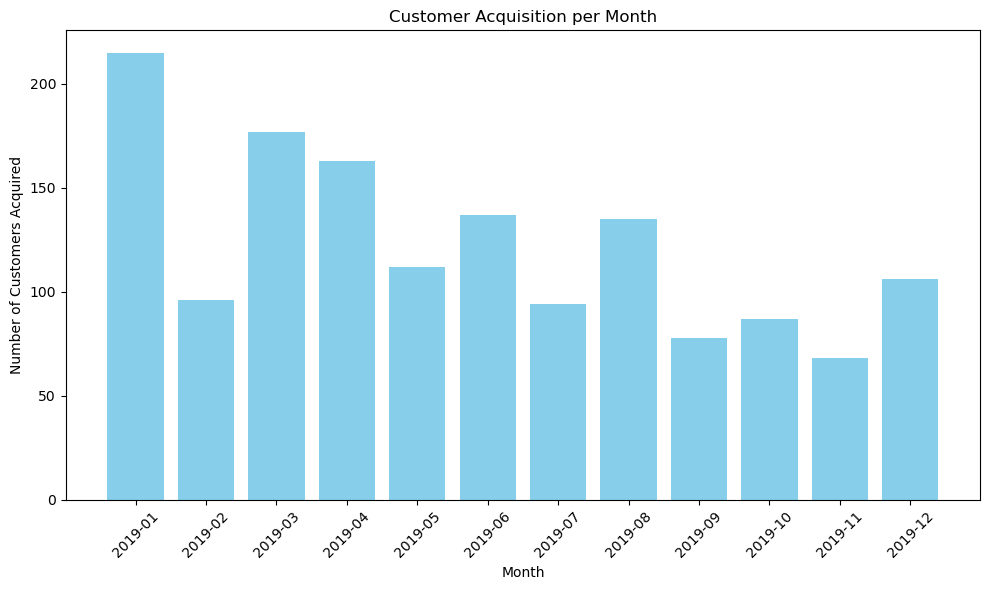

In [32]:
# Plotting the number of customers acquired per month
plt.figure(figsize=(10, 6))
plt.bar(customer_acquisition['Month'].astype(str), customer_acquisition['Customers_Acquired'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Customers Acquired')
plt.title('Customer Acquisition per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Understand the retention of customers on month on month basis

In [33]:
# COUNT OF CUSTOMERS HAVING MORE THAN 1 PURCHASE
CUST_PURCHASE =  DATA.groupby('CustomerID')['Transaction_ID'].count()

In [34]:
CUST_PURCHASE = (CUST_PURCHASE>2).sum()

In [35]:
CUST_PURCHASE

1354

In [36]:
# NOW CALCULATE UMIQUE CUSTOMERS
TOTAL =  DATA['CustomerID'].nunique()

In [37]:
TOTAL

1468

In [38]:
# Calculate the repeat rate
repeat_rate = (CUST_PURCHASE / TOTAL) * 100

In [39]:
repeat_rate

92.23433242506812

In [40]:
# Extract 'Year' and 'Month' to create a 'YearMonth' column
DATA['YearMonth'] = DATA['Transaction_Date'].dt.strftime('%Y-%m')

In [41]:
# TO  Calculate the repeat rate OF EVERY MONTH
def calculate_repeat_rate(df,year_month):
    DATA_CURRENT_MONTH = DATA[DATA['YearMonth']== year_month]
    first_purchase = DATA.groupby('CustomerID')['Transaction_Date'].min()
    DATA['FIRSTPURCHASE'] = DATA['CustomerID'].map(first_purchase)
    DATA_CURRENT_MONTH['FIRSTPURCHASE']=DATA_CURRENT_MONTH['CustomerID'].map(first_purchase)
    DATA_CURRENT_MONTH[DATA_CURRENT_MONTH['FIRSTPURCHASE'] <= year_month]
    repeat_customers = DATA_CURRENT_MONTH[DATA_CURRENT_MONTH['Transaction_Date']>DATA_CURRENT_MONTH['FIRSTPURCHASE']].groupby('CustomerID')['Transaction_Date'].nunique().sum()
    total_customers = DATA_CURRENT_MONTH['CustomerID'].nunique()
    return (repeat_customers / total_customers) * 100 if total_customers != 0 else 0


In [42]:
year_months = DATA['YearMonth'].unique()
repeat_rate=pd.DataFrame({'MONTH': year_months,
                          'REPEAT_RATE': [calculate_repeat_rate(DATA,ym) for ym in year_months ]})

C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\3495048646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA_CURRENT_MONTH['FIRSTPURCHASE']=DATA_CURRENT_MONTH['CustomerID'].map(first_purchase)


In [43]:
repeat_rate

,MONTH,REPEAT_RATE
0,2019-01,22.790698
1,2019-08,77.333333
2,2019-12,76.271186
3,2019-03,38.942308
4,2019-06,69.111969
5,2019-09,82.383420
6,2019-10,79.047619
7,2019-11,88.829787
8,2019-02,43.119266
9,2019-04,51.785714


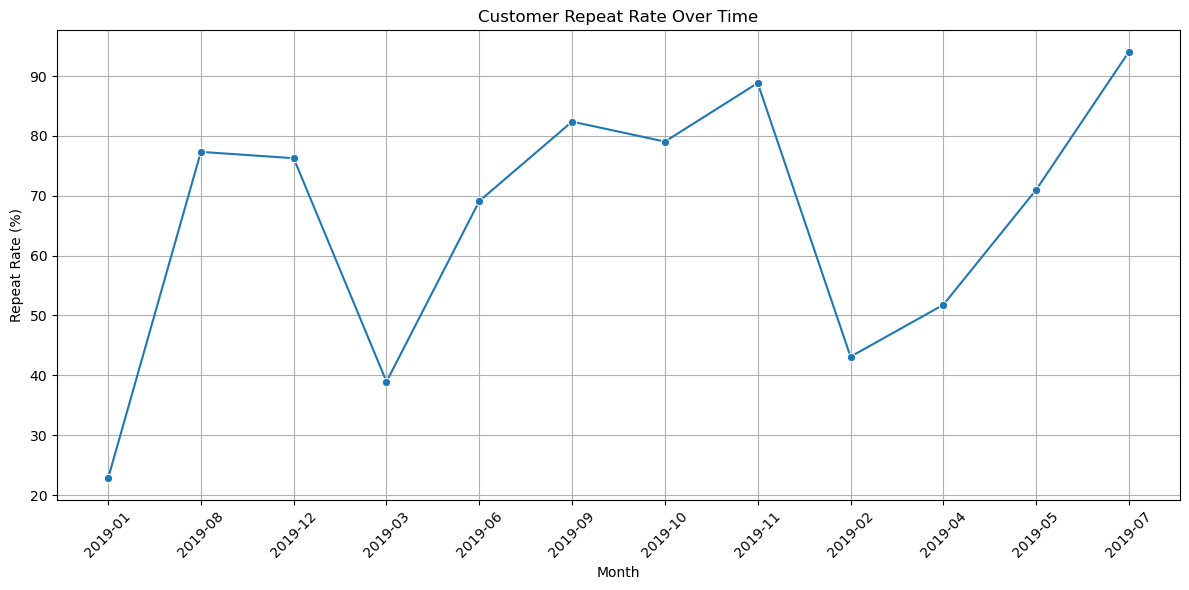

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=repeat_rate, x='MONTH', y='REPEAT_RATE', marker='o')
plt.xlabel('Month')
plt.ylabel('Repeat Rate (%)')
plt.title('Customer Repeat Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

###  How the revenues from existing/new customers on month on month basis


In [45]:
# CREATE A NEW COLUMN CUSTOMER TYPE DEFINING WHETHER THE CUSTOMER IS NEW OR NOT
DATA['Customer_Type'] = DATA.apply(lambda row: 'New' if row['Transaction_Date'] == row['FIRSTPURCHASE'] else 'Existing', axis=1)

In [46]:
# Group data by 'YearMonth' and 'Customer_Type' to calculate revenue
revenue_data = DATA.groupby(['YearMonth', 'Customer_Type'])['Invoice'].sum().reset_index()

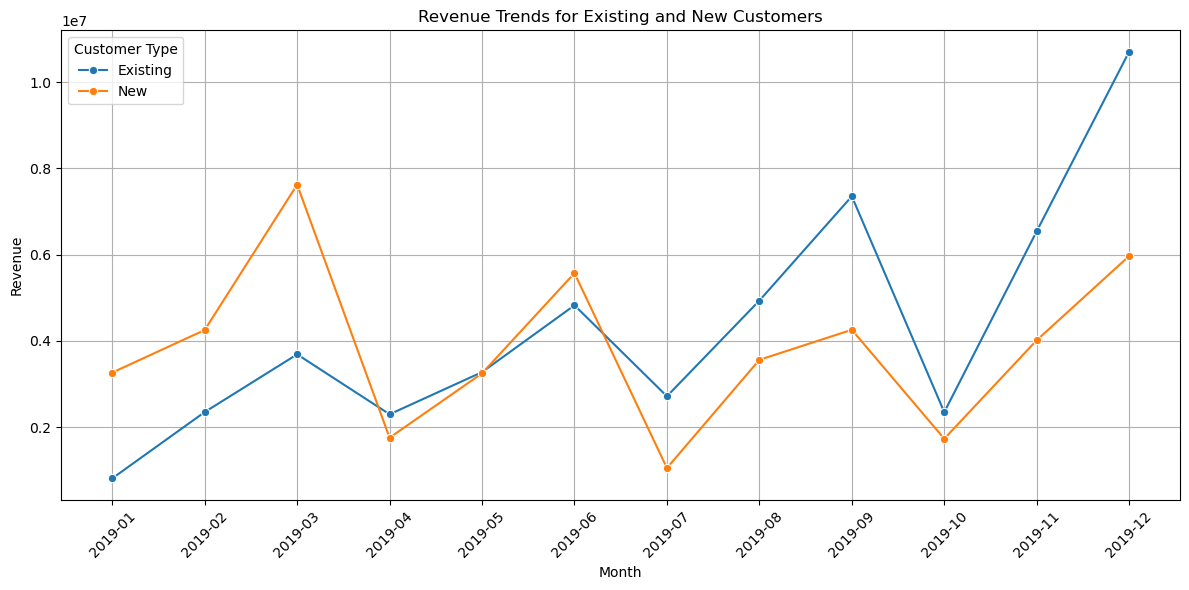

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_data, x='YearMonth', y='Invoice', hue='Customer_Type', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue Trends for Existing and New Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Customer Type')
plt.show()

###  How the discounts playing role in the revenues?

In [48]:
# Create discount bins for grouping
bins = [0, 10.0, 20.0, 30.0]
labels = [ 'Low Discount', 'Medium Discount', 'High Discount']


In [49]:
# Add a new column for discount range
DATA['Discount_Range'] = pd.cut(DATA['Discount_pct'], bins=bins, labels=labels, include_lowest=True)

In [50]:
# Group by discount range and calculate total revenue
discount_revenue = DATA.groupby('Discount_Range')['Invoice'].sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\3647341951.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_revenue = DATA.groupby('Discount_Range')['Invoice'].sum()


In [51]:
discount_revenue

Discount_Range
Low Discount       1.596921e+07
Medium Discount    3.217492e+07
High Discount      4.999716e+07
Name: Invoice, dtype: float64

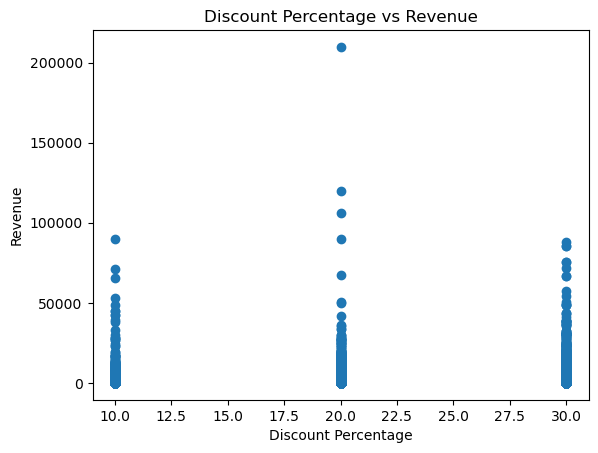

In [52]:
# Scatter plot of Discount vs Revenue
plt.scatter(DATA['Discount_pct'], DATA['Invoice'])
plt.xlabel('Discount Percentage')
plt.ylabel('Revenue')
plt.title('Discount Percentage vs Revenue')
plt.show()

###  Analyse KPI’s like Revenue, number of orders, average order value, number of 
customers (existing/new), quantity, by category, by month, by week, by day etc…

In [53]:
 monthly_kpis = DATA.groupby(['YearMonth', 'Product_Category']).agg(
    Revenue=('Invoice', 'sum'),
    Number_of_Orders=('Transaction_ID', 'nunique'),
    Avg_Order_Value=('Invoice', lambda x: x.sum() / x.nunique()),
    Total_Quantity=('Quantity', 'sum'),
    Number_of_Customers=('CustomerID', 'nunique')
).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\1835483865.py:4: RuntimeWarning: invalid value encountered in scalar divide
  Avg_Order_Value=('Invoice', lambda x: x.sum() / x.nunique()),


In [54]:
monthly_kpis

,YearMonth,Product_Category,Revenue,Number_of_Orders,Avg_Order_Value,Total_Quantity,Number_of_Customers
0,2019-01,Accessories,5.170430e+02,1,517.043000,1,1
1,2019-01,Android,7.609760e+02,4,380.488000,4,4
2,2019-01,Apparel,4.222854e+05,471,2258.210852,1500,164
3,2019-01,Backpacks,0.000000e+00,3,NaN,3,3
4,2019-01,Bags,1.188591e+05,118,1366.196789,860,68
...,...,...,...,...,...,...,...
202,2019-12,Nest-Canada,1.690184e+05,23,28169.725167,34,18
203,2019-12,Nest-USA,8.950243e+06,1314,162731.691782,2289,201
204,2019-12,Notebooks & Journals,2.947529e+04,9,3275.032444,55,7
205,2019-12,Office,5.915525e+05,238,3542.230323,4858,125


In [55]:
customer_kpis = DATA.groupby(['YearMonth', 'Customer_Type']).agg(
    Revenue=('Invoice', 'sum'),
    Number_of_Customers=('CustomerID', 'nunique')
).reset_index()

In [56]:
customer_kpis

,YearMonth,Customer_Type,Revenue,Number_of_Customers
0,2019-01,Existing,8.102844e+05,39
1,2019-01,New,3.264970e+06,215
2,2019-02,Existing,2.348425e+06,40
3,2019-02,New,4.252093e+06,96
4,2019-03,Existing,3.687625e+06,64
5,2019-03,New,7.623686e+06,177
6,2019-04,Existing,2.297201e+06,91
7,2019-04,New,1.754174e+06,163
8,2019-05,Existing,3.274820e+06,111
9,2019-05,New,3.247110e+06,112


In [57]:
category_kpis = DATA.groupby('Product_Category').agg(
    Revenue=('Invoice', 'sum'),
    Number_of_Orders=('Transaction_ID', 'nunique'),
    Avg_Order_Value=('Invoice', lambda x: x.sum() / x.nunique()),
    Total_Quantity=('Quantity', 'sum'),
    Number_of_Customers=('CustomerID', 'nunique')
).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\652260568.py:4: RuntimeWarning: invalid value encountered in scalar divide
  Avg_Order_Value=('Invoice', lambda x: x.sum() / x.nunique()),


In [58]:
category_kpis

,Product_Category,Revenue,Number_of_Orders,Avg_Order_Value,Total_Quantity,Number_of_Customers
0,Accessories,1.483230e+05,191,1225.810017,1097,150
1,Android,1.586192e+04,43,793.095850,45,42
2,Apparel,1.337592e+07,8129,4401.420586,32438,1323
3,Backpacks,0.000000e+00,84,NaN,113,75
4,Bags,3.381395e+06,1545,3895.616876,15273,728
5,Bottles,1.427237e+05,258,864.992015,2090,203
6,Drinkware,4.482860e+06,2524,2814.098947,30501,919
7,Fun,0.000000e+00,146,NaN,834,118
8,Gift Cards,2.730598e+05,157,10502.301115,206,77
9,Google,0.000000e+00,105,NaN,575,89


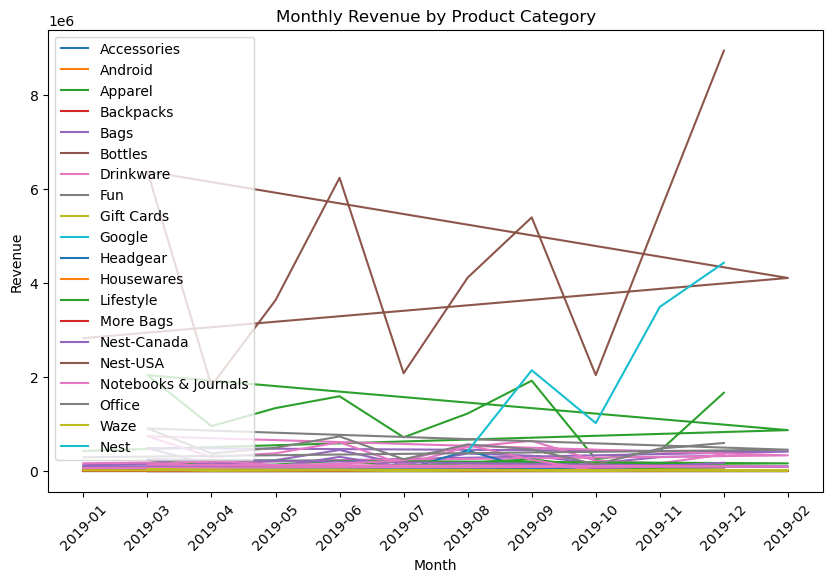

In [59]:
# Plot Monthly Revenue by Category
plt.figure(figsize=(10, 6))
for category in monthly_kpis['Product_Category'].unique():
    data = monthly_kpis[monthly_kpis['Product_Category'] == category]
    plt.plot(data['YearMonth'].astype(str), data['Revenue'], label=category)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue by Product Category')
plt.legend()
plt.xticks(rotation=45)
plt.show()

###  Understand the trends/seasonality of sales by category, location, month etc…

In [60]:
category_trends = DATA.groupby(['YearMonth', 'Product_Category']).agg(
    Revenue=('Invoice', 'sum'),
    Number_of_Orders=('Transaction_ID', 'nunique'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

In [61]:
category_trends

,YearMonth,Product_Category,Revenue,Number_of_Orders,Total_Quantity
0,2019-01,Accessories,5.170430e+02,1,1
1,2019-01,Android,7.609760e+02,4,4
2,2019-01,Apparel,4.222854e+05,471,1500
3,2019-01,Backpacks,0.000000e+00,3,3
4,2019-01,Bags,1.188591e+05,118,860
...,...,...,...,...,...
202,2019-12,Nest-Canada,1.690184e+05,23,34
203,2019-12,Nest-USA,8.950243e+06,1314,2289
204,2019-12,Notebooks & Journals,2.947529e+04,9,55
205,2019-12,Office,5.915525e+05,238,4858


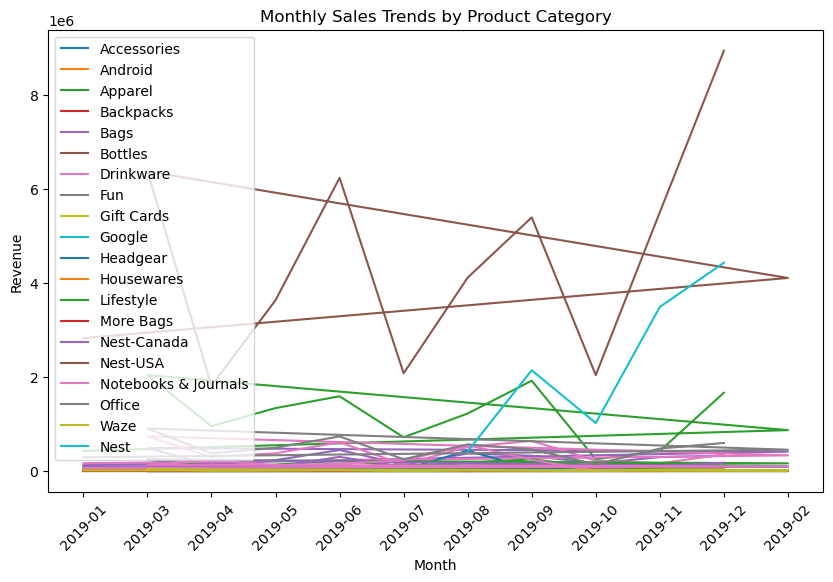

In [62]:
# Plot Monthly Sales Trends by Product Category
plt.figure(figsize=(10, 6))
for category in category_trends['Product_Category'].unique():
    data = category_trends[category_trends['Product_Category'] == category]
    plt.plot(data['YearMonth'].astype(str), data['Revenue'], label=category)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales Trends by Product Category')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [63]:
location_trends = DATA.groupby(['YearMonth', 'Location']).agg(
    Revenue=('Invoice', 'sum'),
    Number_of_Orders=('Transaction_ID', 'nunique'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

In [64]:
location_trends

,YearMonth,Location,Revenue,Number_of_Orders,Total_Quantity
0,2019-01,California,1.512789e+06,783,8885
1,2019-01,Chicago,1.110027e+06,623,3627
2,2019-01,New Jersey,3.175231e+05,173,1883
3,2019-01,New York,7.944042e+05,407,4284
4,2019-01,Washington DC,3.405118e+05,207,1461
5,2019-02,California,1.912007e+06,541,3661
6,2019-02,Chicago,2.294861e+06,641,5727
7,2019-02,New Jersey,6.418700e+05,140,1988
8,2019-02,New York,9.350449e+05,257,2327
9,2019-02,Washington DC,8.167357e+05,119,2872


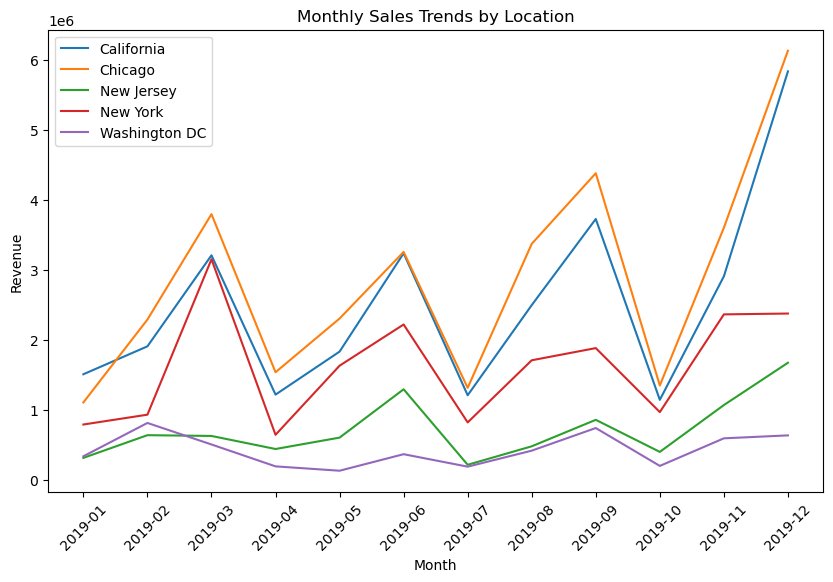

In [65]:
# Plot Monthly Sales Trends by Location
plt.figure(figsize=(10, 6))
for location in location_trends['Location'].unique():
    data = location_trends[location_trends['Location'] == location]
    plt.plot(data['YearMonth'].astype(str), data['Revenue'], label=location)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Sales Trends by Location')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [66]:
customer_trends = DATA.groupby(['YearMonth', 'Customer_Type']).agg(
    Revenue=('Invoice', 'sum'),
    Number_of_Customers=('CustomerID', 'nunique')
).reset_index()

In [67]:
customer_trends

,YearMonth,Customer_Type,Revenue,Number_of_Customers
0,2019-01,Existing,8.102844e+05,39
1,2019-01,New,3.264970e+06,215
2,2019-02,Existing,2.348425e+06,40
3,2019-02,New,4.252093e+06,96
4,2019-03,Existing,3.687625e+06,64
5,2019-03,New,7.623686e+06,177
6,2019-04,Existing,2.297201e+06,91
7,2019-04,New,1.754174e+06,163
8,2019-05,Existing,3.274820e+06,111
9,2019-05,New,3.247110e+06,112


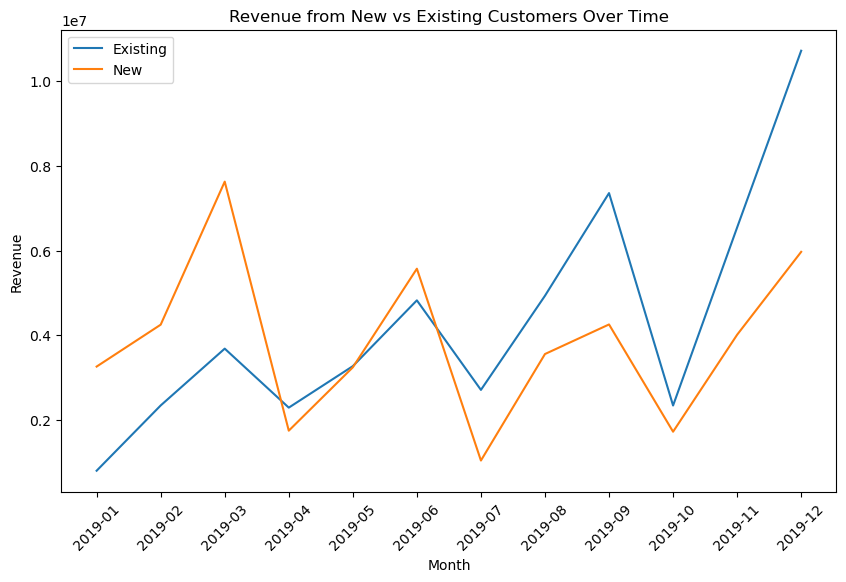

In [68]:
plt.figure(figsize=(10, 6))
for customer_type in customer_trends['Customer_Type'].unique():
    data = customer_trends[customer_trends['Customer_Type'] == customer_type]
    plt.plot(data['YearMonth'].astype(str), data['Revenue'], label=customer_type)

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue from New vs Existing Customers Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

###  How number order varies and sales with different days?

In [69]:
# Extract day of the week
DATA['DayOfWeek'] = DATA['Transaction_Date'].dt.day_name()

In [70]:
# Group by DayOfWeek to calculate number of orders and total revenue
daywise_analysis = DATA.groupby('DayOfWeek').agg(
    Number_of_Orders=('Transaction_ID', 'nunique'),
    Total_Revenue=('Invoice', 'sum')
).reset_index()

In [71]:
daywise_analysis

,DayOfWeek,Number_of_Orders,Total_Revenue
0,Friday,4233,1.862780e+07
1,Monday,2130,7.889143e+06
2,Saturday,3872,1.410848e+07
3,Sunday,3855,1.535265e+07
4,Thursday,4278,1.668392e+07
5,Tuesday,2315,8.161003e+06
6,Wednesday,4378,1.731829e+07


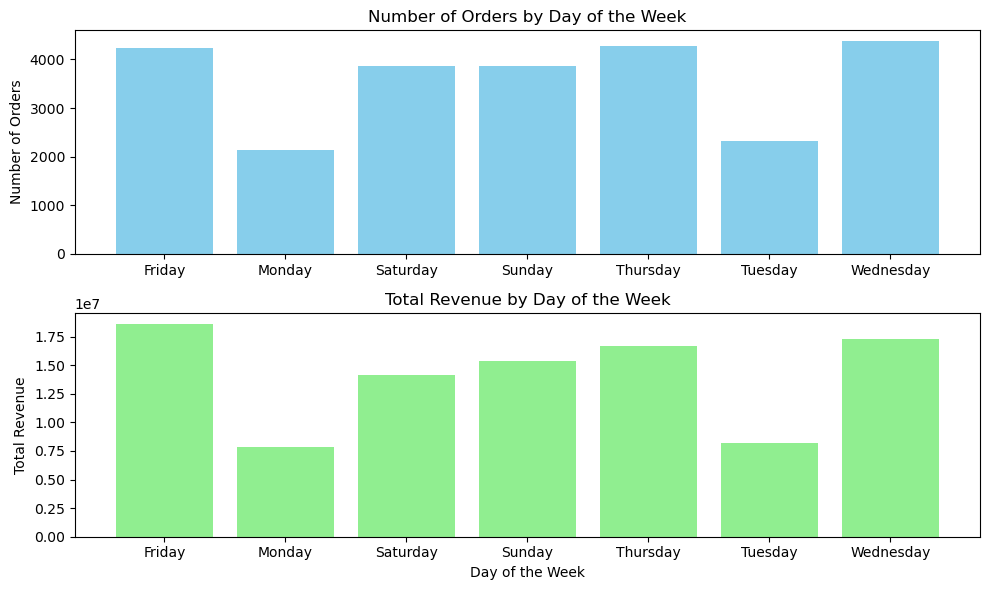

In [72]:
plt.figure(figsize=(10, 6))

# Plot for Number of Orders
plt.subplot(2, 1, 1)
plt.bar(daywise_analysis['DayOfWeek'], daywise_analysis['Number_of_Orders'], color='skyblue')
plt.title('Number of Orders by Day of the Week')
plt.ylabel('Number of Orders')

# Plot for Total Revenue
plt.subplot(2, 1, 2)
plt.bar(daywise_analysis['DayOfWeek'], daywise_analysis['Total_Revenue'], color='lightgreen')
plt.title('Total Revenue by Day of the Week')
plt.ylabel('Total Revenue')
plt.xlabel('Day of the Week')

plt.tight_layout()
plt.show()


###  Calculate the Revenue, Marketing spend, percentage of marketing spend out of 
revenue, Tax, percentage of delivery charges by month.

In [73]:
# Calculate Tax
DATA['Tax'] = DATA['Invoice'] * DATA['GST']

In [74]:
# Calculate Percentage of Delivery Charges
DATA['Delivery_Charge_Percentage'] = (DATA['Delivery_Charges'] / DATA['Invoice']) * 100

In [75]:
DATA['Delivery_Charge_Percentage']

0         0.425329
1         0.425329
2        24.258257
3         0.693449
4         3.576735
           ...    
52919     0.167700
52920     0.386780
52921     0.133980
52922     0.050586
52923     0.194184
Name: Delivery_Charge_Percentage, Length: 52924, dtype: float64

In [76]:
DATA['Marketing_Spend'] = (DATA['Offline_Spend']+DATA['Online_Spend'])

In [77]:
# Calculate Percentage of Marketing Spend out of Revenue 
DATA['Marketing_Spend_Percentage'] = ((DATA['Offline_Spend']+DATA['Online_Spend']) / DATA['Invoice']) * 100

In [78]:
monthly_kpis = DATA.groupby('Month').agg(
    Total_Revenue=('Invoice', 'sum'),
    Total_Marketing_Spend=('Marketing_Spend', 'sum'),
    Avg_Marketing_Spend_Percentage=('Marketing_Spend_Percentage', 'mean'),
    Total_Tax=('Tax', 'sum'),
    Avg_Delivery_Charge_Percentage=('Delivery_Charge_Percentage', 'mean')
).reset_index()

In [79]:
monthly_kpis

,Month,Total_Revenue,Total_Marketing_Spend,Avg_Marketing_Spend_Percentage,Total_Tax,Avg_Delivery_Charge_Percentage
0,Apr,4.051376e+06,21655922.13,3221.527592,5.053465e+05,5.182452
1,Aug,8.494319e+06,28385733.77,1929.939975,9.615404e+05,3.280688
2,Dec,1.667759e+07,28964402.01,1201.113734,1.634986e+06,1.377617
3,Feb,6.600518e+06,15841536.05,1363.049282,7.909887e+05,3.031180
4,Jan,4.075255e+06,20052775.17,2618.973506,4.648917e+05,5.232194
5,Jul,3.765625e+06,20618934.41,2977.198432,4.502871e+05,6.002799
6,Jun,1.039707e+07,18625403.73,967.766974,1.256784e+06,1.727463
7,Mar,1.131131e+07,17453780.31,768.032080,1.400239e+06,2.271846
8,May,6.521930e+06,17525521.02,1251.527046,8.069751e+05,2.617986
9,Nov,1.055815e+07,21096299.69,1730.706390,9.558846e+05,2.289999


In [80]:
monthly_kpis['Marketing_Spend_Out_of_Revenue'] = (monthly_kpis['Total_Marketing_Spend'] / monthly_kpis['Total_Revenue']) * 100

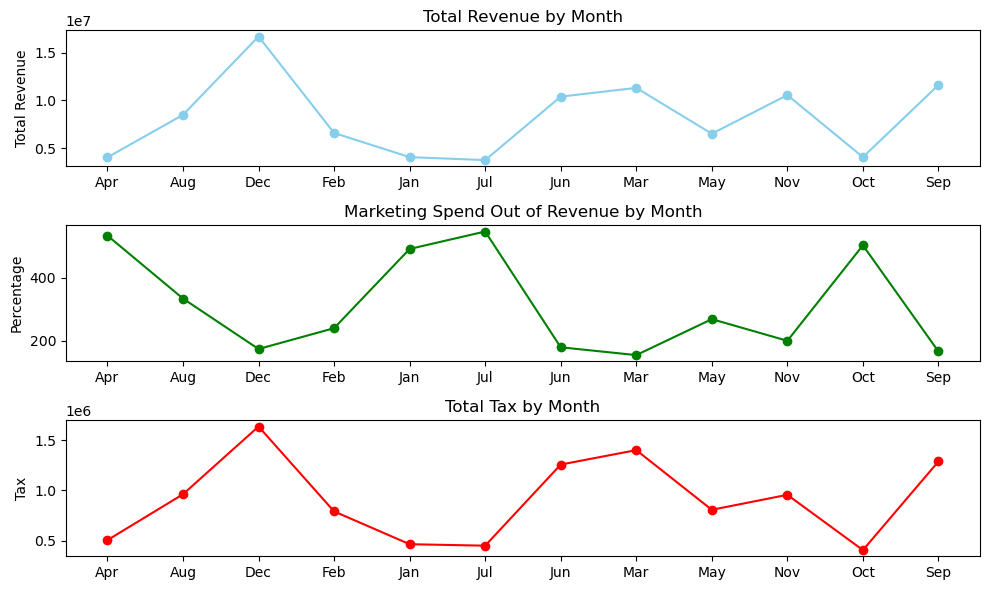

In [81]:
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(monthly_kpis['Month'].astype(str), monthly_kpis['Total_Revenue'], marker='o', color='skyblue')
plt.title('Total Revenue by Month')
plt.ylabel('Total Revenue')

# Plot Marketing Spend Percentage out of Revenue by Month
plt.subplot(3, 1, 2)
plt.plot(monthly_kpis['Month'].astype(str), monthly_kpis['Marketing_Spend_Out_of_Revenue'], marker='o', color='green')
plt.title('Marketing Spend Out of Revenue by Month')
plt.ylabel('Percentage')

# Plot Total Tax by Month
plt.subplot(3, 1, 3)
plt.plot(monthly_kpis['Month'].astype(str), monthly_kpis['Total_Tax'], marker='o', color='red')
plt.title('Total Tax by Month')
plt.ylabel('Tax')

plt.tight_layout()
plt.show()

###  How marketing spend is impacting on revenue?

In [82]:
# Calculate the correlation between marketing spend and revenue
correlation = DATA['Invoice'].corr(DATA['Marketing_Spend'])

In [83]:
correlation

0.06371404411306053

In [84]:
monthly_data =DATA[['YearMonth', 'Invoice', 'Marketing_Spend']]

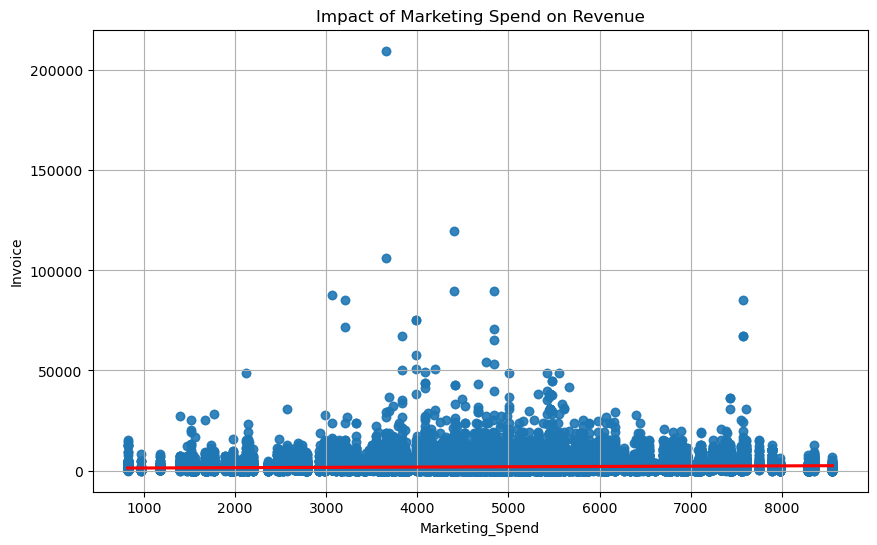

In [85]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Marketing_Spend'], monthly_data['Invoice'], marker='o', alpha=0.5)
plt.title('Impact of Marketing Spend on Revenue')
plt.xlabel('Total Marketing Spend')
plt.ylabel('Revenue')
plt.grid(True)
# Optionally, you can create a regression line to visualize the trend
sns.regplot(x='Marketing_Spend', y='Invoice', data=monthly_data, line_kws={'color': 'red'})

# Show the plot
plt.show()

A positive correlation (0.063) indicates that as marketing spend increases, revenue tends to increase as well. 

###  Which product was appeared in the transactions?


In [86]:
unique_products = DATA['Product_Description'].unique()

In [87]:
unique_products

array(['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel',
       'Google Laptop and Cell Phone Stickers',
       "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
       'Google Canvas Tote Natural/Navy', 'Sport Bag',
       'Google 22 oz Water Bottle', 'Google Infuser-Top Water Bottle',
       'Engraved Ceramic Google Mug', '7&quot; Dog Frisbee',
       'Nest Cam Outdoor Security Camera - USA',
       "Google Men's Short Sleeve Hero Tee Heather",
       'Waze Mobile Phone Vent Mount',
       'Nest Protect Smoke + CO White Battery Alarm-USA',
       'Android Glass Water Bottle with Black Sleeve',
       'Android Rise 14 oz Mug', "Google Women's Yoga Jacket Black",
       'Collapsible Shopping Bag', 'Google Trucker Hat',
       'YouTube Luggage Tag', "YouTube Men's Fleece Hoodie Black",
       'Reusable Shopping Bag', 'Nest Cam Indoor Security Camera - USA',
       'Leatherette Journal', '26 oz Double Wall Insulated Bottle',
       'Google Doodle Decal', 'YouTube Custom Dec

In [88]:
# Count the number of times each product appeared in transactions
product_count = DATA['Product_Description'].value_counts()

In [89]:
# Get the top 5 most frequent products
top_5_products = product_count.head(5)
top_5_products

Product_Description
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel    3511
Nest Cam Outdoor Security Camera - USA                    3328
Nest Cam Indoor Security Camera - USA                     3230
Google Sunglasses                                         1523
Nest Protect Smoke + CO White Battery Alarm-USA           1361
Name: count, dtype: int64

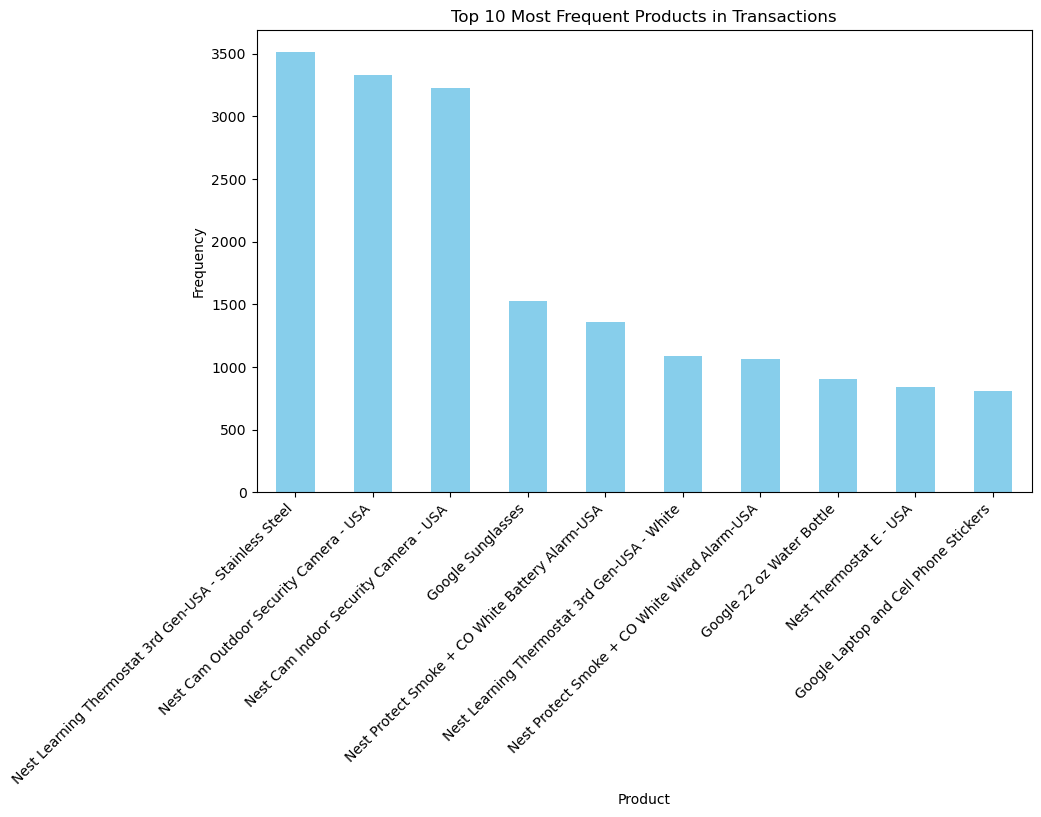

In [90]:
# Plot the top 10 most frequent products
top_10_products = product_count.head(10)
top_10_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Frequent Products in Transactions')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

###  Which product was purchased mostly based on the quantity?

In [91]:
product_quantity = DATA.groupby('Product_Description')['Quantity'].sum().sort_values(ascending=False)

In [92]:
product_quantity

Product_Description
Maze Pen                                                       16234
Google 22 oz Water Bottle                                      14282
Google Sunglasses                                              11452
Sport Bag                                                       7321
Google Metallic Notebook Set                                    6496
                                                               ...  
Google Tee Red                                                     3
Android 5-Panel Low Cap                                            3
Compact Journal with Recycled Pages                                1
Android Women's Short Sleeve Tri-blend Badge Tee Light Blue        1
Google Women's Colorblock Tee White                                1
Name: Quantity, Length: 404, dtype: int64

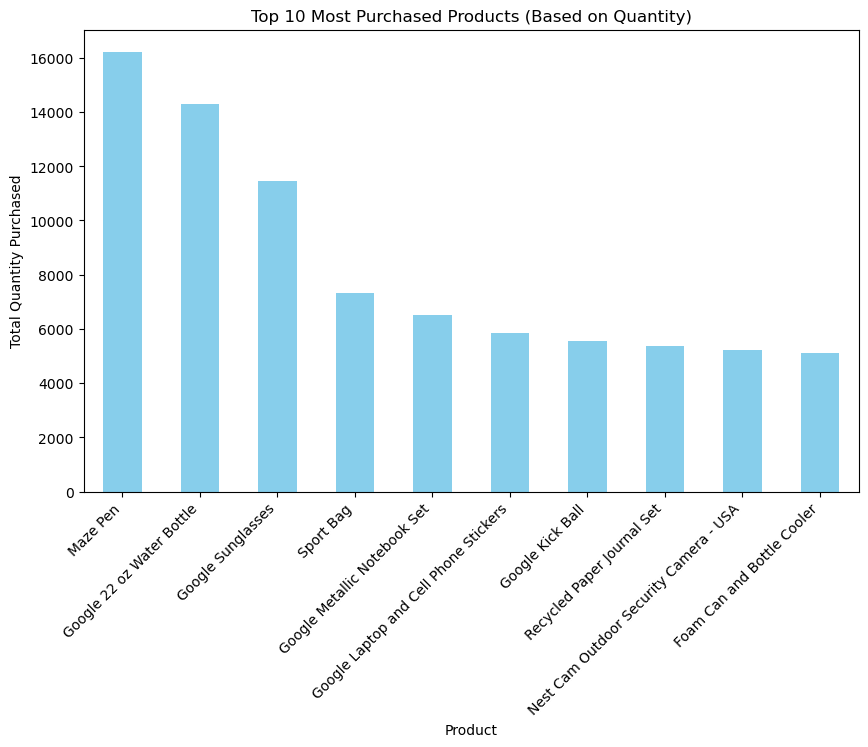

In [93]:
top_10_products = product_quantity.head(10)
top_10_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Purchased Products (Based on Quantity)')
plt.xlabel('Product')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3. Performing Customer Segmentation
 Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, 
Standard customers and define strategy on the same. 

In [94]:
# LET'S TAKE A REFRENCE DATE HERE I AM TAKING IT AS '2020-01-01'
reference_date = pd.Timestamp('2020-01-01')

In [95]:
reference_date

Timestamp('2020-01-01 00:00:00')

In [96]:
# Calculate RFM Metrics
rfm = DATA.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (reference_date - x.max()).days, 
    'Transaction_ID': 'count', 
    'Invoice': 'sum' 
}).reset_index()

In [97]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [98]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,108,2,1184.9578
1,12347,60,60,432545.5710
2,12348,74,23,32645.8892
3,12350,18,17,43869.5718
4,12356,108,36,46870.1542
...,...,...,...,...
1463,18259,271,7,5445.0660
1464,18260,88,40,60569.0904
1465,18269,195,8,1474.4616
1466,18277,70,1,2956.2000


In [99]:
# Define RFM scoring
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])  
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

In [100]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [101]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346,108,2,1184.9578,3,1,1,311
1,12347,60,60,432545.5710,3,4,4,344
2,12348,74,23,32645.8892,3,3,2,332
3,12350,18,17,43869.5718,4,2,3,423
4,12356,108,36,46870.1542,3,3,3,333
...,...,...,...,...,...,...,...,...
1463,18259,271,7,5445.0660,1,1,1,111
1464,18260,88,40,60569.0904,3,3,3,333
1465,18269,195,8,1474.4616,2,1,1,211
1466,18277,70,1,2956.2000,3,1,1,311


In [102]:
# Define Customer Segments based on RFM Score
def segment_customer(rfm_score):
    if rfm_score == '444':
        return 'Premium'
    elif rfm_score in ['443', '433', '344']:
        return 'Gold'
    elif rfm_score in ['322', '333', '343']:
        return 'Silver'
    else:
        return 'Standard'

In [103]:
rfm['Customer_Segment'] = rfm['RFM_Score'].apply(segment_customer)

In [104]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Customer_Segment
0,12346,108,2,1184.9578,3,1,1,311,Standard
1,12347,60,60,432545.5710,3,4,4,344,Gold
2,12348,74,23,32645.8892,3,3,2,332,Standard
3,12350,18,17,43869.5718,4,2,3,423,Standard
4,12356,108,36,46870.1542,3,3,3,333,Silver
...,...,...,...,...,...,...,...,...,...
1463,18259,271,7,5445.0660,1,1,1,111,Standard
1464,18260,88,40,60569.0904,3,3,3,333,Silver
1465,18269,195,8,1474.4616,2,1,1,211,Standard
1466,18277,70,1,2956.2000,3,1,1,311,Standard


C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\777809205.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


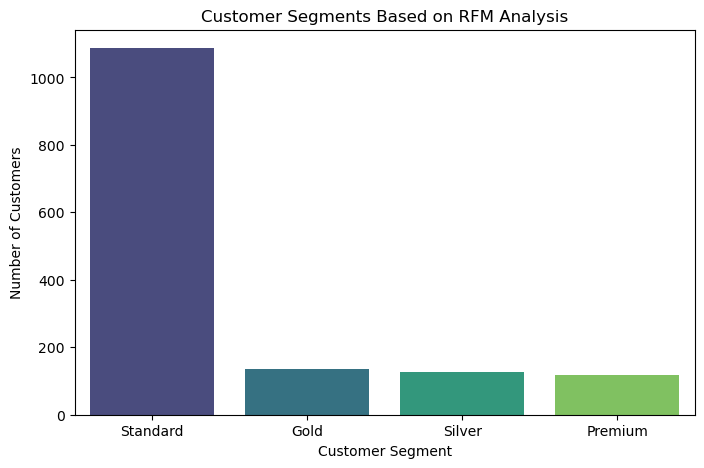

In [105]:
# Count the number of customers in each segment
segment_counts = rfm['Customer_Segment'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Customer Segments Based on RFM Analysis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

###  Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [106]:
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']]

In [107]:
# Step 1: Standardize the data 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [108]:
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

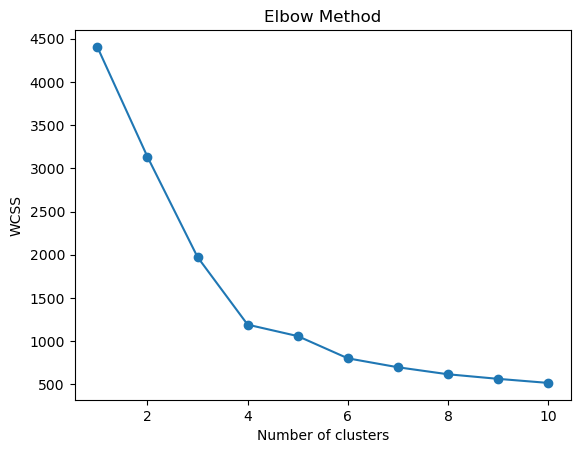

In [109]:
# Plotting the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [110]:
optimal_clusters = 4  # Based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [111]:
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).reset_index()

,Cluster,Recency,Frequency,Monetary,CustomerID
0,0,80.162050,24.044321,4.261835e+04,722
1,1,81.134021,104.871134,2.129653e+05,194
2,2,27.000000,486.625000,1.020827e+06,8
3,3,256.352941,20.819853,3.288410e+04,544


In [112]:
def define_strategy(customer_segment):
    if customer_segment == 'Premium':
        return "Focus on retention, VIP rewards, personalized offers"
    elif customer_segment == 'Gold':
        return "Loyalty programs, personalized communication, cross-sell"
    elif customer_segment == 'Silver':
        return "Encourage repeat purchases, discounts on next purchase"
    elif customer_segment == 'Standard':
        return "Nurture relationship, introduce to new products, upsell"
    

rfm['Strategy'] = rfm['Customer_Segment'].apply(define_strategy)

# Display the first few rows with assigned strategies
rfm[['CustomerID', 'Customer_Segment', 'Strategy']].head()

,CustomerID,Customer_Segment,Strategy
0,12346,Standard,"Nurture relationship, introduce to new product..."
1,12347,Gold,"Loyalty programs, personalized communication, ..."
2,12348,Standard,"Nurture relationship, introduce to new product..."
3,12350,Standard,"Nurture relationship, introduce to new product..."
4,12356,Silver,"Encourage repeat purchases, discounts on next ..."


### 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
 First define dependent variable with categories low value, medium value, high value 
using customer revenue.

In [113]:
customer_revenue = DATA.groupby('CustomerID')['Invoice'].sum().reset_index()
customer_revenue.columns = ['CustomerID', 'Total_Revenue']

In [114]:
customer_revenue

,CustomerID,Total_Revenue
0,12346,1184.9578
1,12347,432545.5710
2,12348,32645.8892
3,12350,43869.5718
4,12356,46870.1542
...,...,...
1463,18259,5445.0660
1464,18260,60569.0904
1465,18269,1474.4616
1466,18277,2956.2000


In [115]:
customer_revenue['CLV_Category'] = pd.qcut(customer_revenue['Total_Revenue'], 
                                           q=[0, .33, .66, 1], 
                                           labels=['Low Value', 'Medium Value', 'High Value'])

In [116]:
customer_revenue.head()

,CustomerID,Total_Revenue,CLV_Category
0,12346,1184.9578,Low Value
1,12347,432545.5710,High Value
2,12348,32645.8892,Medium Value
3,12350,43869.5718,Medium Value
4,12356,46870.1542,Medium Value


In [117]:
DATA = pd.merge(DATA, customer_revenue[['CustomerID', 'CLV_Category']], on='CustomerID', how='left')

In [118]:
X = DATA[['Tenure_Months','Quantity','Avg_Price','Marketing_Spend']]
y=DATA['CLV_Category']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
# USING RANDOM FOREST CLASSIFIER
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [121]:
y_pred = clf.predict(X_test)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  High Value       0.92      0.98      0.95     11068
   Low Value       0.90      0.65      0.76      1290
Medium Value       0.91      0.82      0.86      3520

    accuracy                           0.92     15878
   macro avg       0.91      0.82      0.86     15878
weighted avg       0.92      0.92      0.92     15878



In [123]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9195112734601335


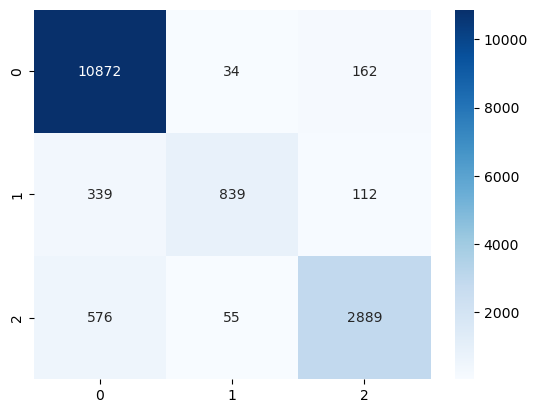

In [124]:
# Confusion Matrix to visualize predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

### 5. Cross-Selling (Which products are selling together)
 You can perform exploratory analysis & market basket analysis to understand which 
of items can be bundled together.

In [125]:
# Group by Transaction_ID and aggregate Product_Description into a list
transactions = DATA.groupby('Transaction_ID')['Product_Description'].apply(set).tolist()

In [126]:
# Generate all possible item pairs from each transaction
itemsets = []
for transaction in transactions:
    itemsets.extend(combinations(transaction, 2))

In [127]:
# Count the frequency of each itemset (pair)
itemset_count = {}

for itemset in itemsets:
    itemset_count[itemset] = itemset_count.get(itemset, 0) + 1

In [128]:
# Calculate support of an itemset
def calculate_support(itemset, transactions):
    return sum([1 for transaction in transactions if set(itemset).issubset(transaction)]) / len(transactions)

In [129]:
# Calculate confidence of an itemset
def calculate_confidence(itemset, item, transactions):
    return calculate_support(itemset, transactions) / calculate_support([item], transactions)

In [130]:
# Calculate lift of an itemset
def calculate_lift(itemset, transactions):
    item1, item2 = itemset
    support_item1 = calculate_support([item1], transactions)
    support_item2 = calculate_support([item2], transactions)
    support_itemset = calculate_support(itemset, transactions)
    return support_itemset / (support_item1 * support_item2)

### 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)
 For this, we need create dependent variable at customer level (average days per one 
transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 
60-90 days and 90+ days) then build classification model to predict next purchase of 
given customer.

In [131]:
# Sort the data by CustomerID and Transaction_Date
DATA = DATA.sort_values(by=['CustomerID', 'Transaction_Date'])

In [132]:
# Calculate time difference between each transaction for each customer
DATA['Days_Between_Transactions'] = DATA.groupby('CustomerID')['Transaction_Date'].diff().dt.days

In [133]:
# Filter for repeat customers (Customers with more than one transaction)
repeat_customers = DATA.groupby('CustomerID').filter(lambda x: len(x) > 1)

In [134]:
# Drop rows where 'Days_Between_Transactions' is NaN (first transaction for each customer)
repeat_customers = repeat_customers.dropna(subset=['Days_Between_Transactions'])

In [135]:
# Calculate average days between transactions for each customer
customer_avg_days = repeat_customers.groupby('CustomerID')['Days_Between_Transactions'].mean().reset_index()

In [136]:
# Rename the column to 'Avg_Days_Between_Transactions'
customer_avg_days.columns = ['CustomerID', 'Avg_Days_Between_Transactions']

In [137]:
# Define bins and labels for the dependent variable
bins = [0, 30, 60, 90, float('inf')]
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']

In [138]:
# Bin the customers based on average days between transactions
customer_avg_days['Next_Purchase_Class'] = pd.cut(customer_avg_days['Avg_Days_Between_Transactions'], bins=bins, labels=labels)

In [139]:
# Merge 'customer_avg_days' with the original dataframe to bring in customer-level features
DATA = DATA.merge(customer_avg_days[['CustomerID', 'Next_Purchase_Class']], on='CustomerID', how='left')

In [140]:
# Drop any rows where 'Next_Purchase_Class' is missing (non-repeat customers)
DATA = DATA.dropna(subset=['Next_Purchase_Class'])

In [141]:
# Extract useful features from 'Transaction_Date'
DATA['Transaction_Year'] =DATA['Transaction_Date'].dt.year
DATA['Transaction_Month'] =DATA['Transaction_Date'].dt.month
DATA['Transaction_Day'] = DATA['Transaction_Date'].dt.day
DATA['Transaction_DayOfWeek'] = DATA['Transaction_Date'].dt.dayofweek

In [142]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Label Encoding for binary categories (e.g., 'Customer_Type')
le = LabelEncoder()
DATA['Customer_Type'] = le.fit_transform(DATA['Customer_Type'])  # 'Existing' -> 0, 'New' -> 1

# One-Hot Encoding for multi-class categorical columns (e.g., 'Product_Category')
DATA= pd.get_dummies(DATA, columns=['Product_Category', 'Location'], drop_first=True)


In [143]:
# Select relevant features
features =['Days_Between_Transactions','Transaction_Year', 'Transaction_Month', 'Transaction_Day' , 'Quantity', 'Customer_Type']

In [144]:
X = DATA[features]

In [145]:
# Target variable
y = DATA['Next_Purchase_Class']

In [146]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
# BUILDING A MODEL USING RANDOM FOREST CLASSIFIER
model = RandomForestClassifier()

In [148]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [149]:
# Predict on the test set
y_pred = model.predict(X_test)

In [150]:
print(classification_report(y_test, y_pred))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   0-30 days       1.00      1.00      1.00     11985
  30-60 days       0.33      0.05      0.09        20
  60-90 days       0.00      0.00      0.00         2
    90+ days       0.00      0.00      0.00         3

    accuracy                           1.00     12010
   macro avg       0.33      0.26      0.27     12010
weighted avg       1.00      1.00      1.00     12010



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 7. Perform cohort analysis by defining below cohorts
 Customers who started in each month and understand their behaviour

In [171]:
# Calculate the repeat rate
def calculate_repeat_rate(df):
    first_purchase = df.groupby('CustomerID')['Transaction_Date'].min()
    repeat_customers = (first_purchase < df['Transaction_Date'].max()).sum()
    total_customers = df['CustomerID'].nunique()
    return repeat_customers / total_customers * 100

In [172]:
repeat_rate = DATA.groupby('YearMonth').apply(calculate_repeat_rate).reset_index()
repeat_rate.columns = ['Month', 'Repeat_Rate']

C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\262247965.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  repeat_rate = DATA.groupby('YearMonth').apply(calculate_repeat_rate).reset_index()


In [173]:
# Perform cohort analysis to track customer retention
def cohort_analysis(df):
    df['CohortMonth'] = df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')
    cohorts = df.groupby(['CohortMonth', 'YearMonth'])['CustomerID'].nunique().reset_index()
    cohorts['Retention'] = cohorts.groupby('CohortMonth')['CustomerID'].transform(lambda x: x / x.iloc[0])
    return cohorts

In [174]:
cohort_data = cohort_analysis(DATA)

In [175]:
cohort_data

,CohortMonth,YearMonth,CustomerID,Retention
0,2019-01,2019-01,133,1.000000
1,2019-01,2019-02,13,0.097744
2,2019-01,2019-03,24,0.180451
3,2019-01,2019-04,34,0.255639
4,2019-01,2019-05,23,0.172932
...,...,...,...,...
73,2019-10,2019-11,6,0.214286
74,2019-10,2019-12,4,0.142857
75,2019-11,2019-11,18,1.000000
76,2019-11,2019-12,7,0.388889


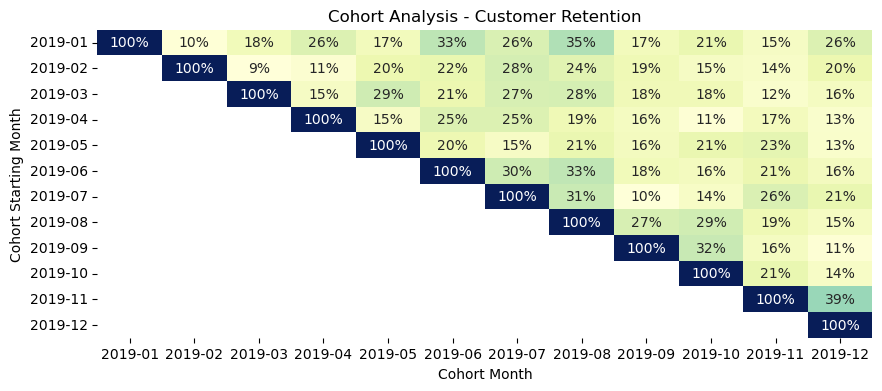

In [178]:
# Plot cohort retention
plt.figure(figsize=(10, 4))
pivot_cohort = cohort_data.pivot_table(index='CohortMonth', columns='YearMonth', values='Retention')
sns.heatmap(pivot_cohort, annot=True, fmt='.0%', cmap='YlGnBu', cbar=False)
plt.xlabel('Cohort Month')
plt.ylabel('Cohort Starting Month')
plt.title('Cohort Analysis - Customer Retention')
plt.show()

###  Which Month cohort has maximum retention?